<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---



<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>
<center><em>et rejoignez-nous sur <a href='https://app.moncoachdata.com/discord'>Discord</a> et <a href='https://app.moncoachdata.com/youtube'>YouTube</a></em></center>



---

# Projet Capstone de Data Science

## Présentation

Si vous envisagez de sortir voir un film, dans quelle mesure pouvez-vous faire confiance aux critiques et aux évaluations en ligne ? 

*Surtout* si l'entreprise affichant la note gagne *aussi* de l'argent en vendant des billets de cinéma. 

Est-ce que l'entreprise a tendance à sur-évaluer les films avec de meilleures notes que celles qu'ils devraient obtenir ?

### Objectif :

**Votre objectif est d'effectuer les tâches ci-dessous en vous référant à l'article du site 538 (lien ci-dessous) et de voir si vous arrivez à la même conclusion. Vous devrez utiliser vos compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure évaluation/notation des films dans le but de vendre plus de billets.**

---

**Effectuez les tâches écrites en gras.**

---



## Partie 1 : Comprendre le contexte et les données


**Tâche : Lire l'article : [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) (si besoin traduisez le avec Google Translate, DeepL ou Fluently)**

----

**Tâche : Après avoir lu l'article, lisez ces deux tableaux donnant un aperçu des deux fichiers .csv avec lesquels nous allons travailler :**

### les données

Ce sont les données derrière l'histoire de l'article [Be Suspicious Of Online Movie Ratings, en particulier Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/) disponible publiquement sur : https://github.com/fivethirtyeight/data. 

Il existe deux fichiers csv, l'un avec les Stars (étoiles) et les Ratings (notes) affichés sur Fandango, et l'autre avec des données agrégées pour les notations/évaluations de films d'autres sites, tels que Metacritic, IMDB et Rotten Tomatoes.

---

#### all_sites_scores.csv

`all_sites_scores.csv` contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

---

#### fandango_scape.csv

`fandango_scrape.csv` contient tous les films de l'article 538 tirés de Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

---

**Tâche : Importez toutes les bibliothèques que vous pensez utiliser :**

In [2]:
# import ici ! TOMBO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Partie 2 : Exploration des scores affichés par Fandango par rapport aux évaluations des utilisateurs réels

Examinons d'abord les notes de Fandango pour voir si notre analyse est en accord avec la conclusion de l'article.

**Tâche : Exécutez la cellule ci-dessous pour lire le fichier fandango_scrape.csv**

In [3]:
# lecture du fichier fandango_scrape.csv dans le dataframe fandango TOMBO
#url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
url_local = "C://Users//ASUS_TMX//Documents//INSI_L2//Python//DATA VIZ//003_Projet_CAPSTONE//Datasets//fandango_scrape.csv"
fandango = pd.read_csv(url_local)

**Tâche : Explorez les propriétés du DataFrame et Head.**

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Tâche : Explorons la relation entre la popularité d'un film et son classement. Créez un nuage de points montrant la relation entre les notes et les votes. N'hésitez pas à modifier le style visuel selon vos préférences.**

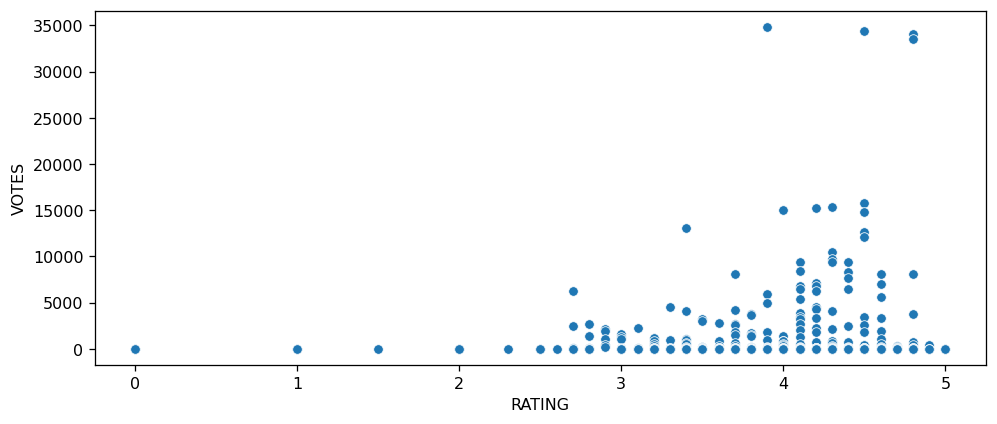

In [7]:
# code ici TOMBO
plt.figure(figsize=(10,4), dpi=115)
myplot=sns.scatterplot(data=fandango, x="RATING", y="VOTES")
plt.show()

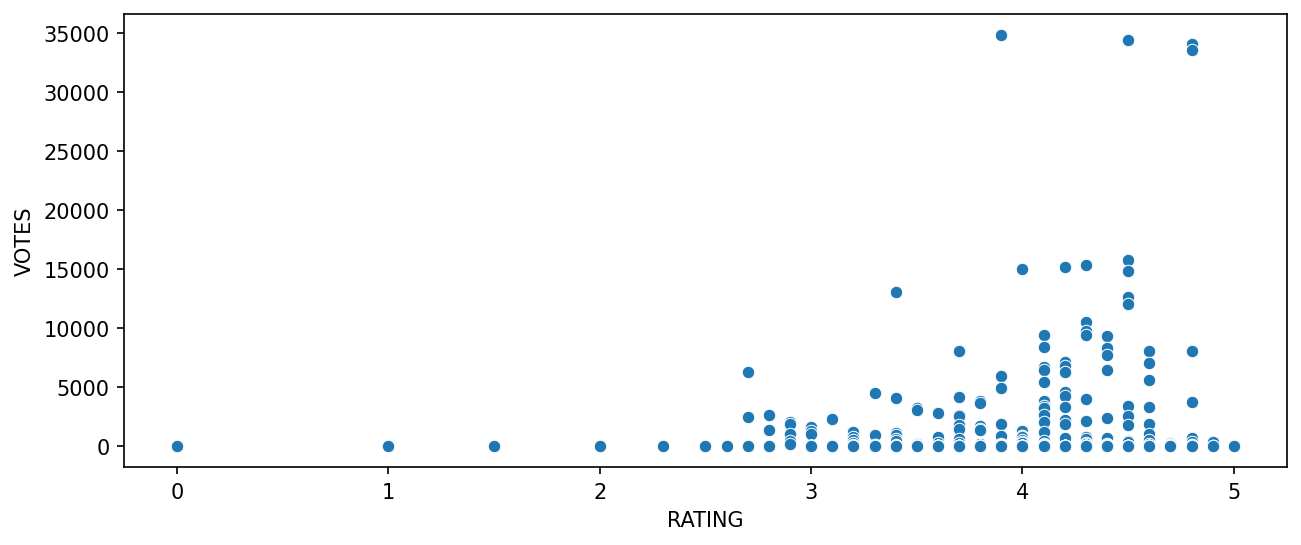

**Tâche : Calculez la corrélation entre les colonnes/features :**

In [8]:
# code ici TOMBO
fandango[['STARS','RATING','VOTES']].corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Tâche : En supposant que chaque ligne de la colonne FILM ait le même format :**

    Nom du titre du film (Année)
    
**Créez une nouvelle colonne contenant l'année de chaque film et définissez cette nouvelle colonne avec le nom YEAR**

In [9]:
# code ici TOMBO
fandango['YEAR']=fandango['FILM'].apply(lambda desc: desc.split()[-1][1:5])
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Tâche : Combien de films y a-t-il par année dans le DataFrame Fandango ?**

In [10]:
# code ici TOMBO
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

**Tâche : Visualisez le nombre de films par an avec un graphique :**

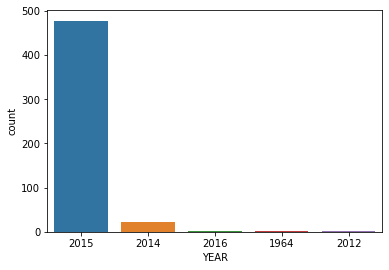

In [11]:
# code ici TOMBO
fig, ax = plt.subplots(figsize=(6, 4), dpi=72)
sns.countplot(data=fandango, x='YEAR', ax=ax)
plt.show()

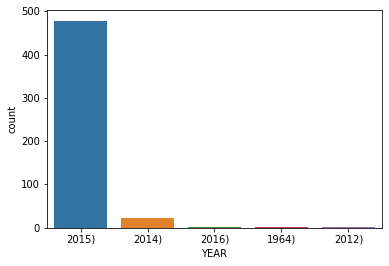

**Tâche : Quels sont les 10 films ayant obtenu le plus grand nombre de votes ?**

In [12]:
# code ici TOMBO
fandango.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**Tâche : Combien de films n'ont aucun avis/vote ?**

In [13]:
# code ici TOMBO
len(fandango[fandango['VOTES']==0]['VOTES'])

69

69

**Tâche : Créez un DataFrame avec uniquement des films évalués (en supprimant tous les films qui n'ont aucun vote).**

In [14]:
# code ici TOMBO
fandango2=fandango.copy()
fandango2=fandango2.set_index('VOTES')
fandango2=fandango2.drop(0, axis=0)
fandango2=fandango2.reset_index()

----

**Comme indiqué dans l'article, en raison de l'affichage HTML et du classement par étoiles, la note réelle de l'utilisateur peut être légèrement différente de celle affichée à un utilisateur. Visualisons cette différence avec des distributions.**

**Tâche : Créez un diagramme KDE (ou plusieurs kdeplots) qui affiche la distribution des notes affichées (STARS) par rapport à l'évaluation réelle des votes (RATING). Limitez les KDE à 0-5.**

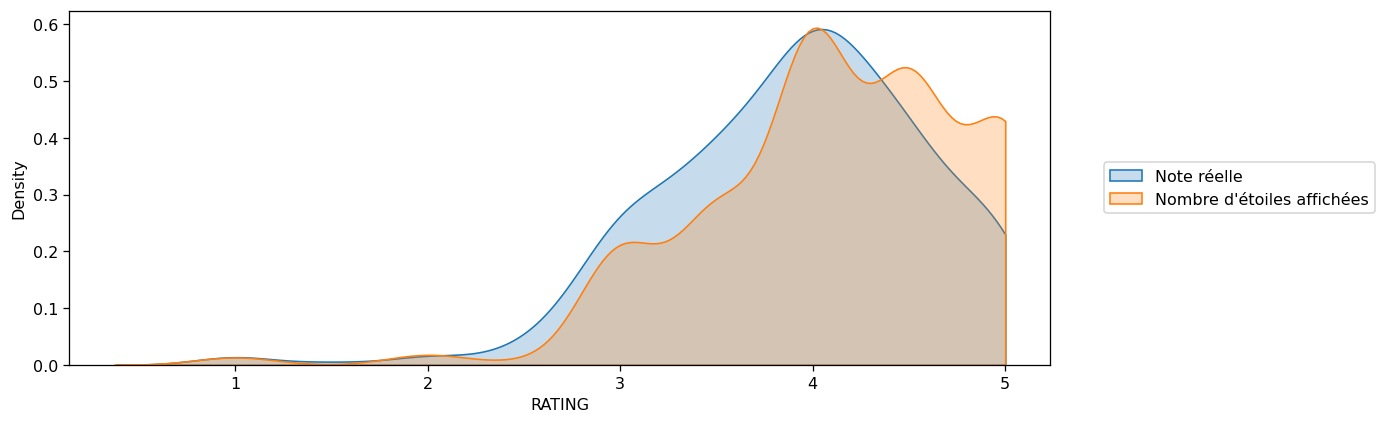

In [15]:
# code ici TOMBO
fig, ax = plt.subplots(figsize=(11, 4), dpi=115)
sns.kdeplot(data=fandango2, x="RATING", bw_adjust=1, clip=[0,5], ax=ax, fill=True)
sns.kdeplot(data=fandango2, x="STARS", bw_adjust=1, clip=[0,5], ax=ax, fill=True)
plt.legend(['Note réelle',"Nombre d'étoiles affichées"],loc='center right', bbox_to_anchor=(1.34, 0.5))
plt.show()

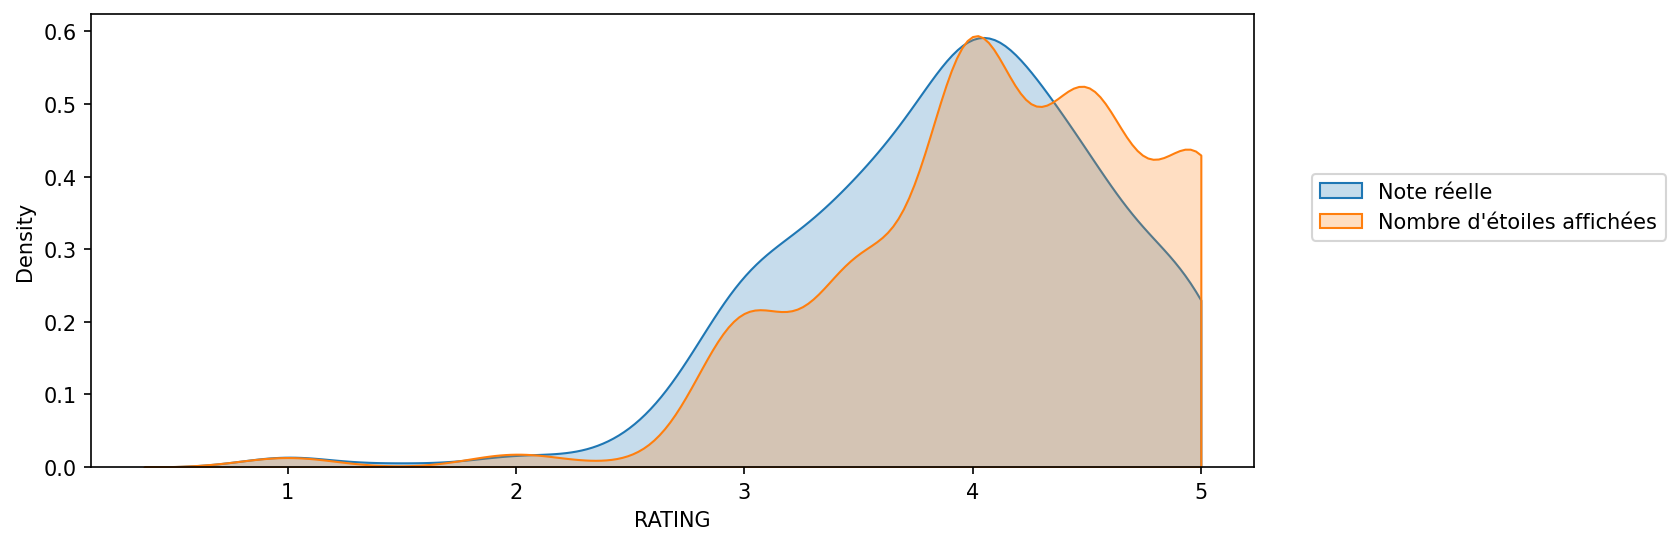

**Tâche : Quantifions maintenant cet écart. Créez une nouvelle colonne de la différence entre les étoiles affichées (STARS) et les notes réelles (RATING). Calculez cette différence avec STARS-RATING et arrondissez-la à la décimale la plus proche.**

In [16]:
# code ici TOMBO
fandango2['STARS_DIFF']=round(fandango2['STARS']-fandango2['RATING'],1)
fandango2

,VOTES,FILM,STARS,RATING,YEAR,STARS_DIFF
0,34846,Fifty Shades of Grey (2015),4.0,3.9,2015,0.1
1,34390,Jurassic World (2015),4.5,4.5,2015,0.0
2,34085,American Sniper (2015),5.0,4.8,2015,0.2
3,33538,Furious 7 (2015),5.0,4.8,2015,0.2
4,15749,Inside Out (2015),4.5,4.5,2015,0.0
...,...,...,...,...,...,...
430,1,That Sugar Film (2015),5.0,5.0,2015,0.0
431,1,The Intern (2015),5.0,5.0,2015,0.0
432,1,The Park Bench (2015),5.0,5.0,2015,0.0
433,1,The Wanted 18 (2015),5.0,5.0,2015,0.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**Tâche : Créez un diagramme de comptage (countplot) pour afficher le nombre de fois qu'une certaine différence se produit.**

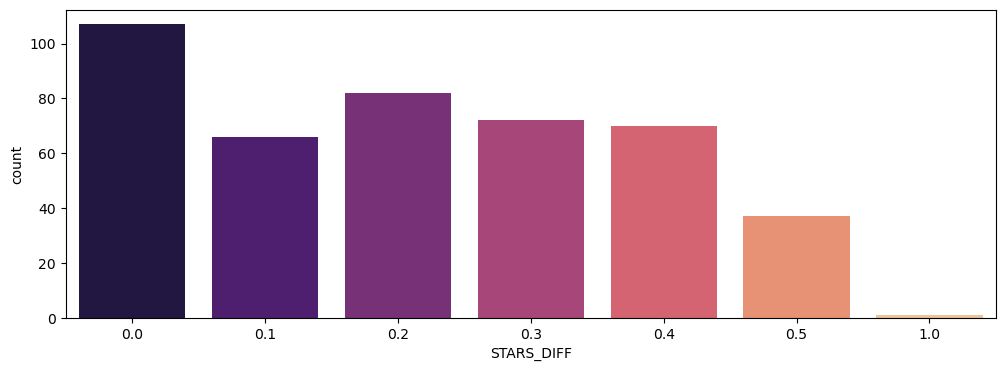

In [17]:
# code ici TOMBO
plt.figure(figsize=(12,4))
sns.countplot(data=fandango2, x='STARS_DIFF', palette='magma')
plt.show()

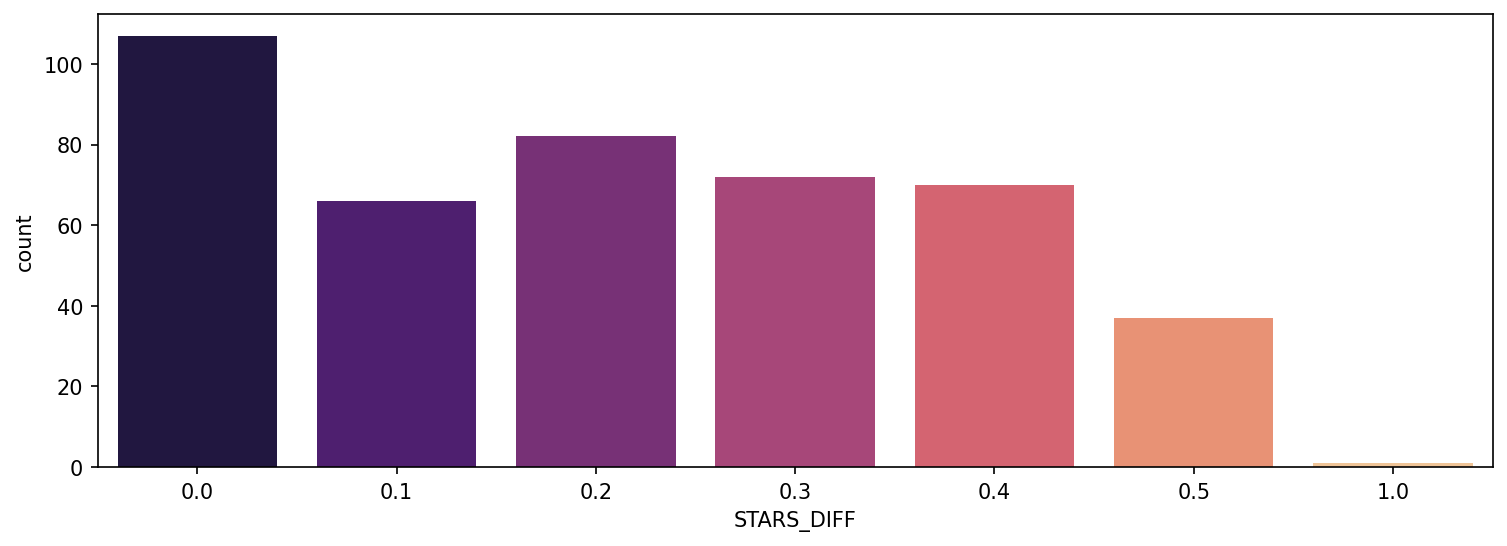

**Tâche : Nous pouvons voir sur le diagramme précédent qu'un film affichait une différence d'une étoile par rapport à sa véritable note ! Quel film a eu ce différentiel proche d'une étoile ?**

In [18]:
# code ici TOMBO
fandango2[fandango2['STARS_DIFF']==1]

,VOTES,FILM,STARS,RATING,YEAR,STARS_DIFF
381,2,Turbo Kid (2015),5.0,4.0,2015,1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## Partie 3 : Comparaison des évaluations de Fandango avec d'autres plateformes

Comparons maintenant les scores de Fandango à d'autres sites d'évaluation de films et voyons comment ils se comparent.


**Tâche : Lisez le fichier "all_sites_scores.csv" en exécutant la cellule ci-dessous**

In [19]:
 # Lecture du fichier all_sites_scores.csv dans le dataframe all_sites TOMBO
#url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
url_local= "C://Users//ASUS_TMX//Documents//INSI_L2//Python//DATA VIZ//003_Projet_CAPSTONE//Datasets//all_sites_scores.csv"
all_sites = pd.read_csv(url_local)

**Tâche : Explorez les colonnes du DataFrame, ses informations, sa description statistiques.**

In [20]:
# TOMBO
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
# TOMBO
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
# TOMBO
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs. 

**Tâche : Créez un nuage de points explorant la relation entre les avis des critiques RT et les avis des utilisateurs RT.**

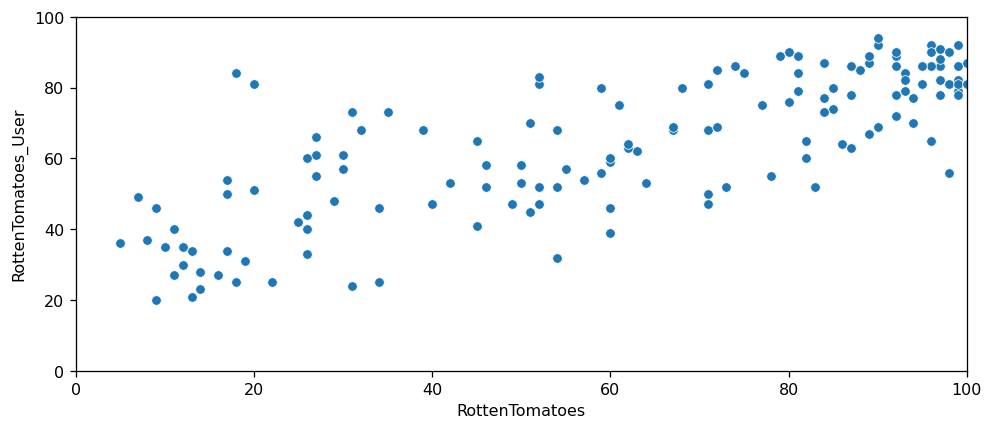

In [23]:
# TOMBO
# code ici
plt.figure(figsize=(10,4),dpi=115)
myplot = sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
myplot.set_xlim(0,100)
myplot.set_ylim(0,100)
plt.show()

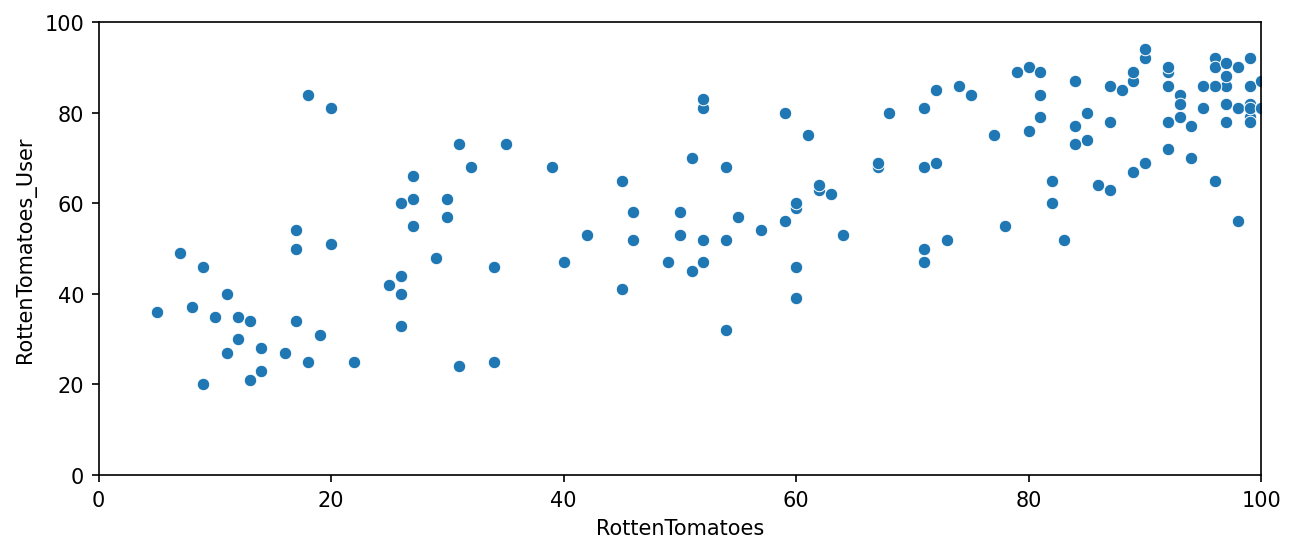

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User. 

Remarque : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques


**Tâche : Créez une nouvelle colonne basée sur la différence entre les notes des critiques et les notes des utilisateurs pour Rotten Tomatoes. Calculez ceci avec RottenTomatoes-RottenTomatoes_User**

In [24]:
# TOMBO
# code ici
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Comparons maintenant la différence moyenne globale. Puisque nous avons affaire à des différences qui peuvent être négatives ou positives, prenez d'abord la valeur absolue de toutes les différences, puis prenez la moyenne. Cela retournera la moyenne des valeurs absolues de la différence entre la note des critiques et la note des utilisateurs.

**Tâche : Calculez la différence absolue moyenne entre les notes RT et les notes des utilisateurs RT comme décrit ci-dessus.**

In [25]:
# TOMBO
# code ici
all_sites['Rotten_Diff_Abs']=abs(all_sites['Rotten_Diff'])
all_sites['Rotten_Diff_Abs'].mean()

15.095890410958905

15.095890410958905

**Tâche : Tracez la distribution des différences entre la note des critiques RT et la note des utilisateurs RT. Ce diagramme de distribution doit comporter des valeurs négatives. N'hésitez pas à utiliser une courbe KDE ou un histogramme pour afficher cette distribution.**

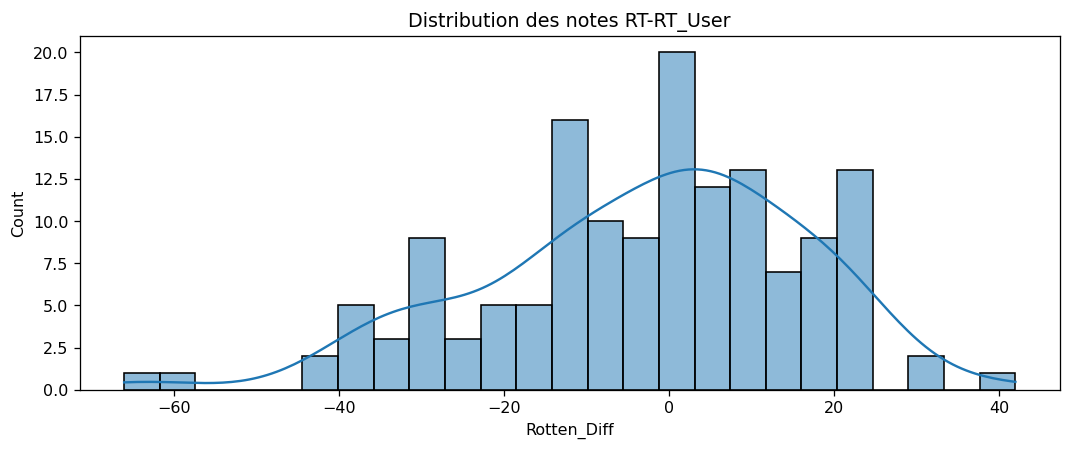

In [26]:
# TOMBO
# code ici
plt.figure(figsize=(11, 4), dpi=115)
sns.histplot(data=all_sites, x="Rotten_Diff", kde=True, bins=25)
plt.title('Distribution des notes RT-RT_User')
plt.show()

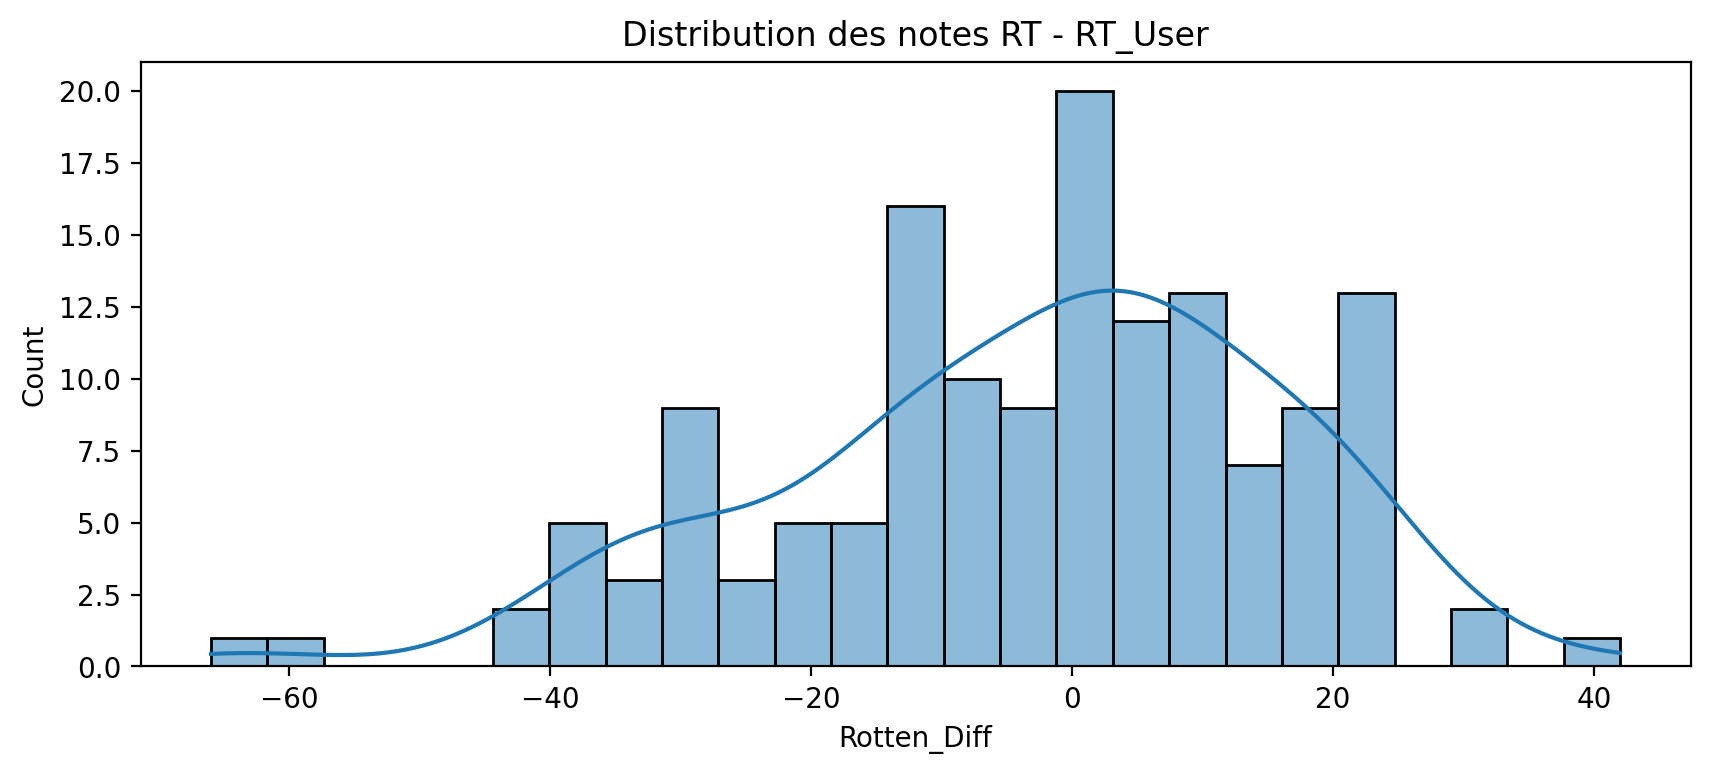

**Tâche : Créez maintenant une distribution montrant la *valeur absolue* de la différence des notes entre les critiques et les utilisateurs sur Rotten Tomatoes.**

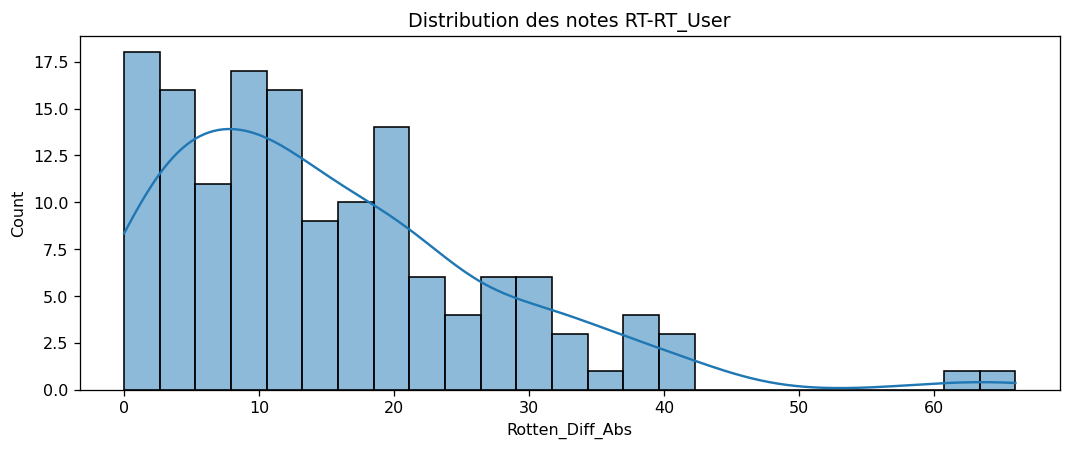

In [27]:
# TOMBO
# code ici
plt.figure(figsize=(11, 4), dpi=115)
sns.histplot(data=all_sites, x="Rotten_Diff_Abs", kde=True, bins=25)
plt.title('Distribution des notes RT-RT_User')
plt.show()

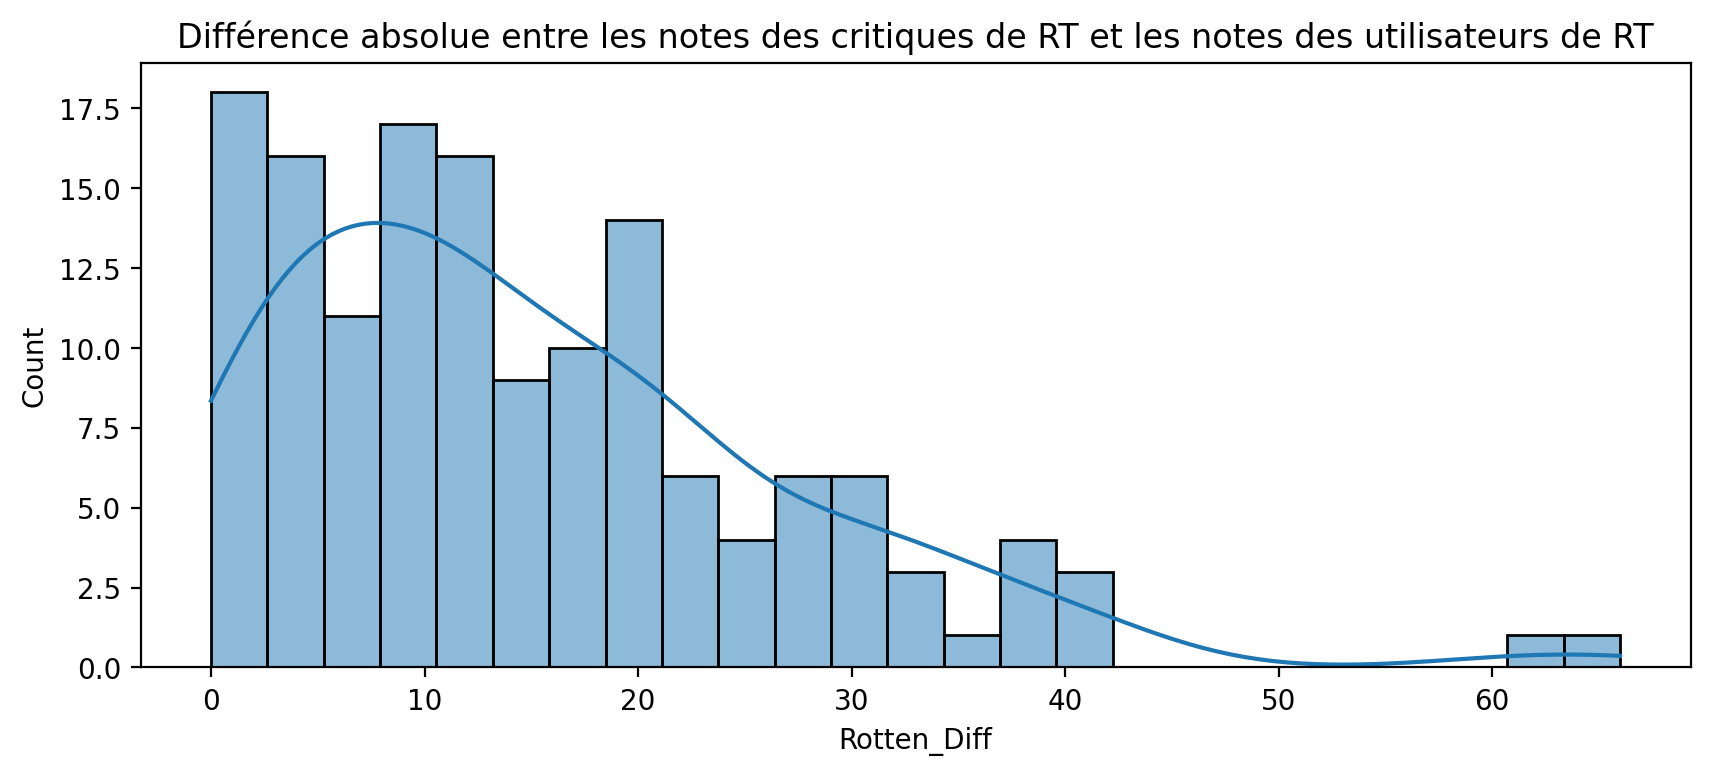

**Voyons quels films sont à l'origine des différences les plus importantes. Tout d'abord, montrez les 5 meilleurs films présentant la plus grande différence *négative* entre les utilisateurs et les critiques de RT. Puisque nous avons calculé la différence en tant que (Notes des Critiques - Notes des Utilisateurs), les grandes valeurs négatives impliquent que les utilisateurs ont évalué le film beaucoup plus haut en moyenne que les critiques.** # TOMBO

**Tâche : Quels sont le top 5 des films qui ont obtenu une note moyenne des utilisateurs supérieure à celle des critiques :**

In [28]:
# code ici# TOMBO
print('Les utilisateurs adorent mais les critiques détestent')
all_sites[all_sites['Rotten_Diff']<0][['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff').head()

Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Tâche : Affichez maintenant le top 5 des films qui ont obtenu une note moyenne des critiques supérieure à celle des utilisateurs.**

In [29]:
# Code ici# TOMBO
print('Les utilisateurs adorent mais les critiques détestent')
all_sites[all_sites['Rotten_Diff']>0][['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending=False).head()

Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


### MetaCritic

Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.

**Tâche : Créez un nuage de points de la note MetaCritic par rapport à la note Metacritic des utilisateurs.**

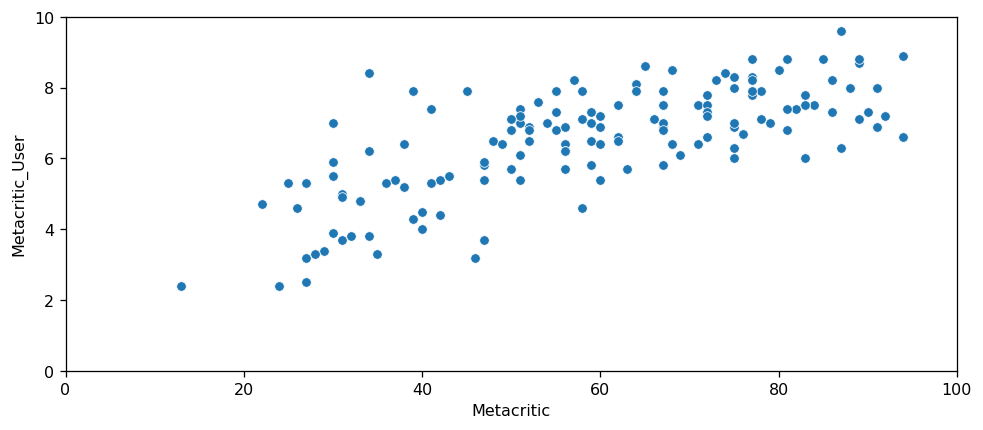

In [30]:
# code ici# TOMBO
plt.figure(figsize=(10,4), dpi=115)
myplot=sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
myplot.set_xlim(0,100)
myplot.set_ylim(0,10)
plt.show()

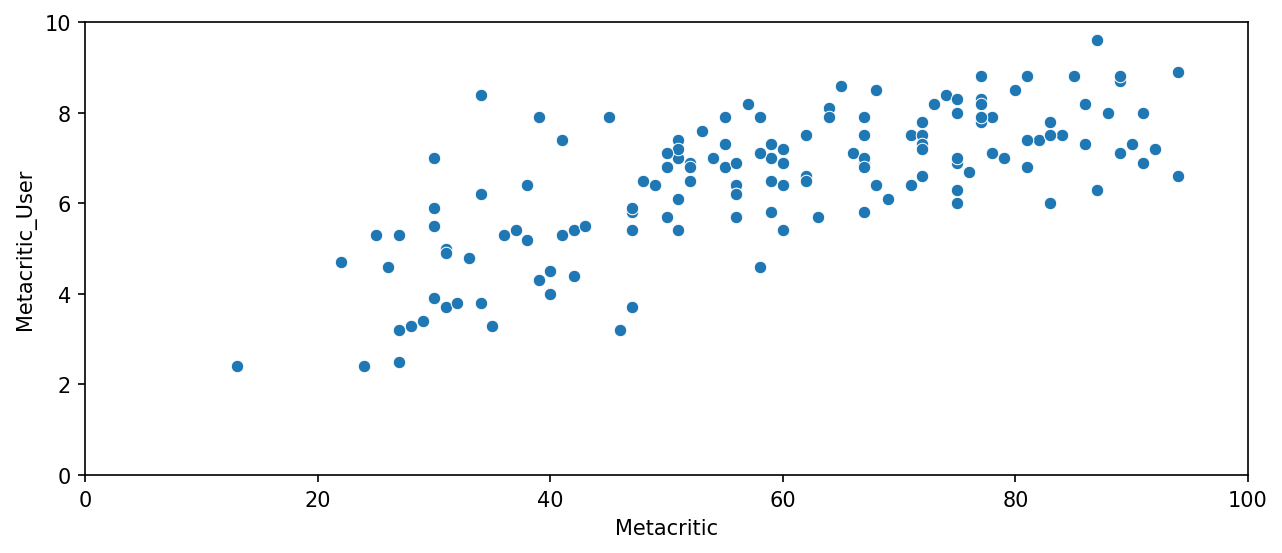

### IMDb

Enfin, explorons IMDb. Notez que Metacritic et IMDb offrent le nombre de votes. Analysons les films les plus populaires.


**Tâche : Créez un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb.**

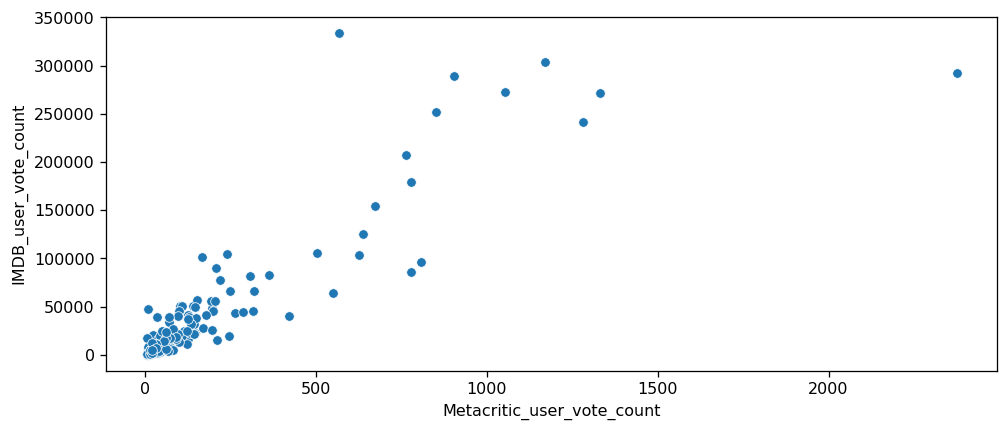

In [31]:
# code ici# TOMBO
plt.figure(figsize=(10,4), dpi=115)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
plt.show()

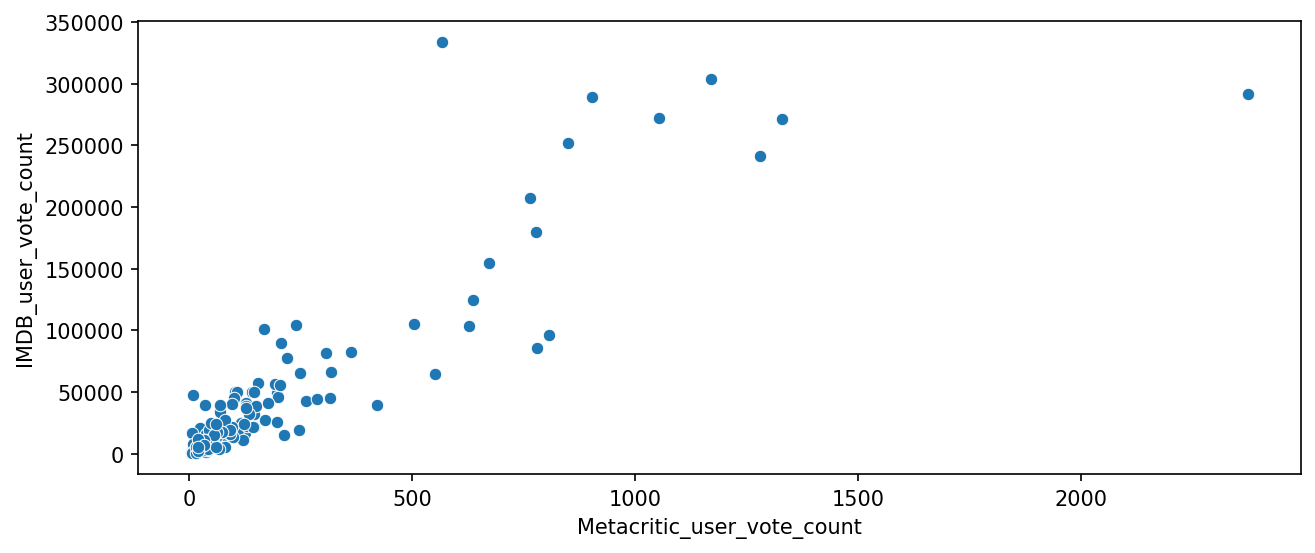

**Notez qu'il y a deux valeurs aberrantes (outliers) ici. Le film ayant obtenu le plus grand nombre de votes sur IMDb n'a qu'environ 500 notes MetaCritic. Quel est ce film ?**

**Tâche : Quel film a le plus grand nombre de votes des utilisateurs IMDd ?**

In [32]:
# code ici# TOMBO
all_sites[all_sites['IMDB_user_vote_count']==all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Tâche : Quel film a le plus grand nombre de votes des utilisateurs MetaCritic ?**

In [33]:
# code ici# TOMBO
all_sites[all_sites['Metacritic_user_vote_count']==all_sites['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Notes Fandago vs. Autres Plateformes

Pour finir, commençons à examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

**Tâche : Combinez la table Fandango avec la table all_sites. Tous les films de la table Fandango ne sont pas dans la table all_sites, car certains films de Fandango ont très peu ou pas de critiques. Nous voulons uniquement comparer les films qui se trouvent dans les deux DataFrames, donc effectuez une fusion *inner* pour fusionner les deux DataFrames en fonction des colonnes FILM.**

In [34]:
# code ici# TOMBO
fusion = pd.merge(fandango,all_sites,how='inner',on='FILM').drop('Rotten_Diff_Abs',axis=1)
fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [35]:
# TOMBO
fusion.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


### Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

Notez que RT, MetaCritic et IMDb n'utilisent pas un score (note) compris entre 0 et 5 étoiles comme le fait Fandango. Pour faire une comparaison équitable, nous devons *normaliser* ces valeurs afin qu'elles se situent toutes entre 0 et 5 étoiles et que la relation entre les avis reste la même.

**Tâche : Créez de nouvelles colonnes normalisées pour toutes les notes afin qu'elles correspondent à la plage de 0 à 5 étoiles affichée sur Fandango. Il existe de nombreuses façons de procéder.**

Lien indice : https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Astuce plus facile, gardez à l'esprit qu'il s'agit d'un moyen simple de convertir les notes :
* 100/20 = 5 
* 10/2 = 5

In [36]:
# code ici# TOMBO
fusion['RT_Norm']=round((fusion['RottenTomatoes']/20),1)
fusion['RTU_Norm']=round((fusion['RottenTomatoes_User']/20),1)
fusion['Meta_Norm']=round((fusion['Metacritic']/20),1)
fusion['Meta_U_Norm']=round((fusion['Metacritic_User']/2),1)
fusion['IMDB_Norm']=round((fusion['IMDB']/2),1)
fusion.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Tâche : Créez maintenant un DataFrame norm_scores qui ne contient que les notes normalisées. Incluez à la fois STARS et RATING de la table Fandango d'origine.**

In [37]:
# code ici# TOMBO
norm_scores=fusion[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']].copy()
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparaison de la distribution des notes entre les sites


Maintenant, c'est le moment de vérité ! Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?


**Tâche : Créez un diagramme comparant les distributions des notes normalisées sur tous les sites. Il existe de nombreuses façons de le faire, mais explorez la documentation Seaborn KdePlot pour trouver des moyens simples de le montrer rapidement. Ne vous inquiétez pas si le format de votre tracé n'est pas exactement le même que le nôtre, tant que les différences de distribution sont claires.**

Note rapide si vous rencontrez des problèmes pour déplacer la légende d'un kdeplot Seaborn : https://github.com/mwaskom/seaborn/issues/2280

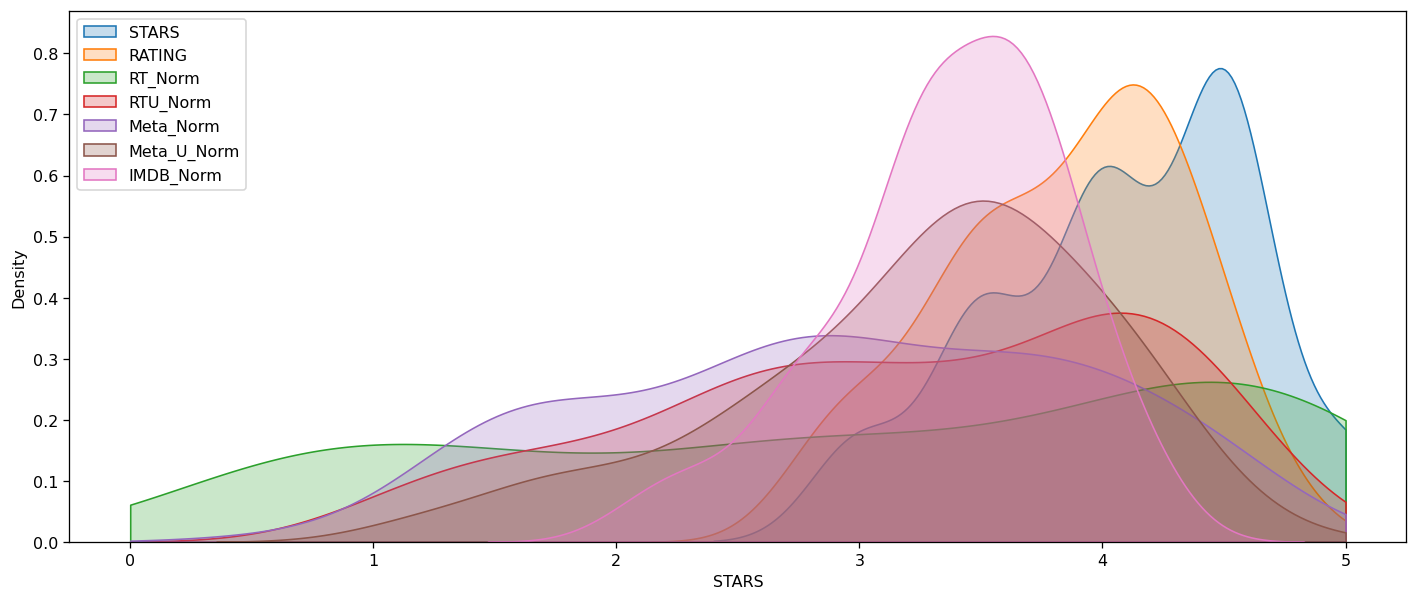

In [38]:
# code ici# TOMBO
plt.figure(figsize=(15,6), dpi=115)
sns.kdeplot(data=norm_scores, x="STARS", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='STARS')
sns.kdeplot(data=norm_scores, x="RATING", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='RATING')
sns.kdeplot(data=norm_scores, x="RT_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='RT_Norm')
sns.kdeplot(data=norm_scores, x="RTU_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='RTU_Norm')
sns.kdeplot(data=norm_scores, x="Meta_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='Meta_Norm')
sns.kdeplot(data=norm_scores, x="Meta_U_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='Meta_U_Norm')
sns.kdeplot(data=norm_scores, x="IMDB_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='IMDB_Norm')
plt.legend(loc='upper left')
plt.show()

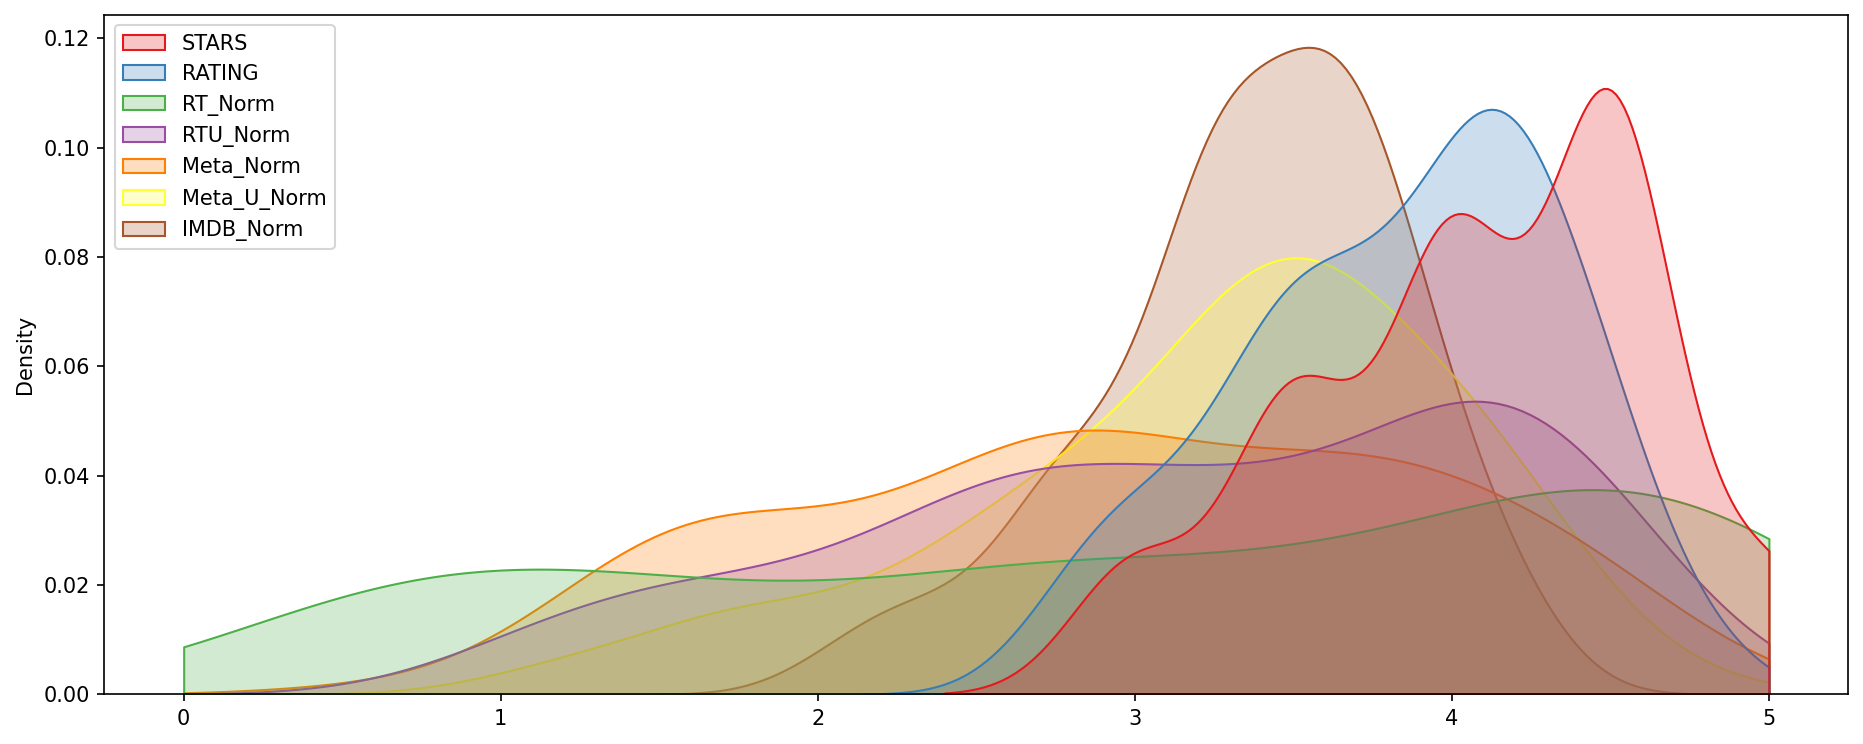

**Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme. Comparons directement ces deux-là.**

**Tâche : Créez un diagramme KDE qui compare la distribution des notes des critiques RT avec les STARS affichées par Fandango.**

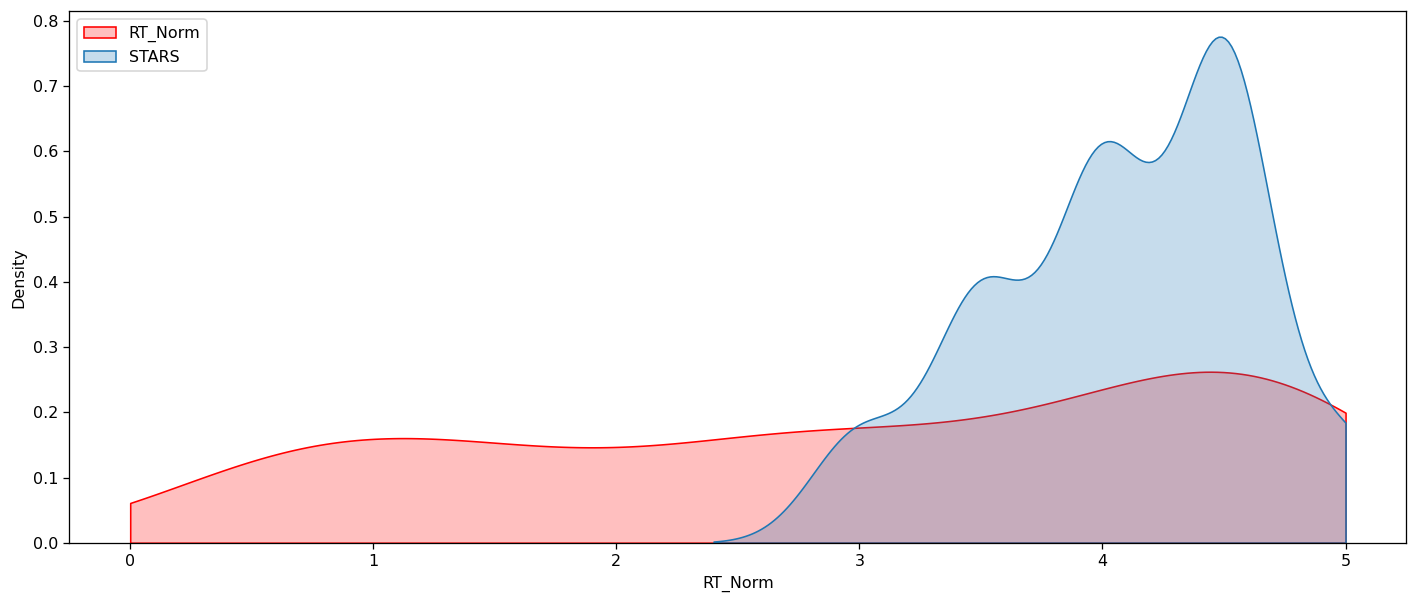

In [39]:
# code ici# TOMBO
plt.figure(figsize=(15,6), dpi=115)
sns.kdeplot(data=norm_scores, x="RT_Norm", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='RT_Norm', color='red')
sns.kdeplot(data=norm_scores, x="STARS", bw_adjust=1, clip=[0,5], fill=True, legend=True, label='STARS')
plt.legend(loc='upper left')
plt.show()

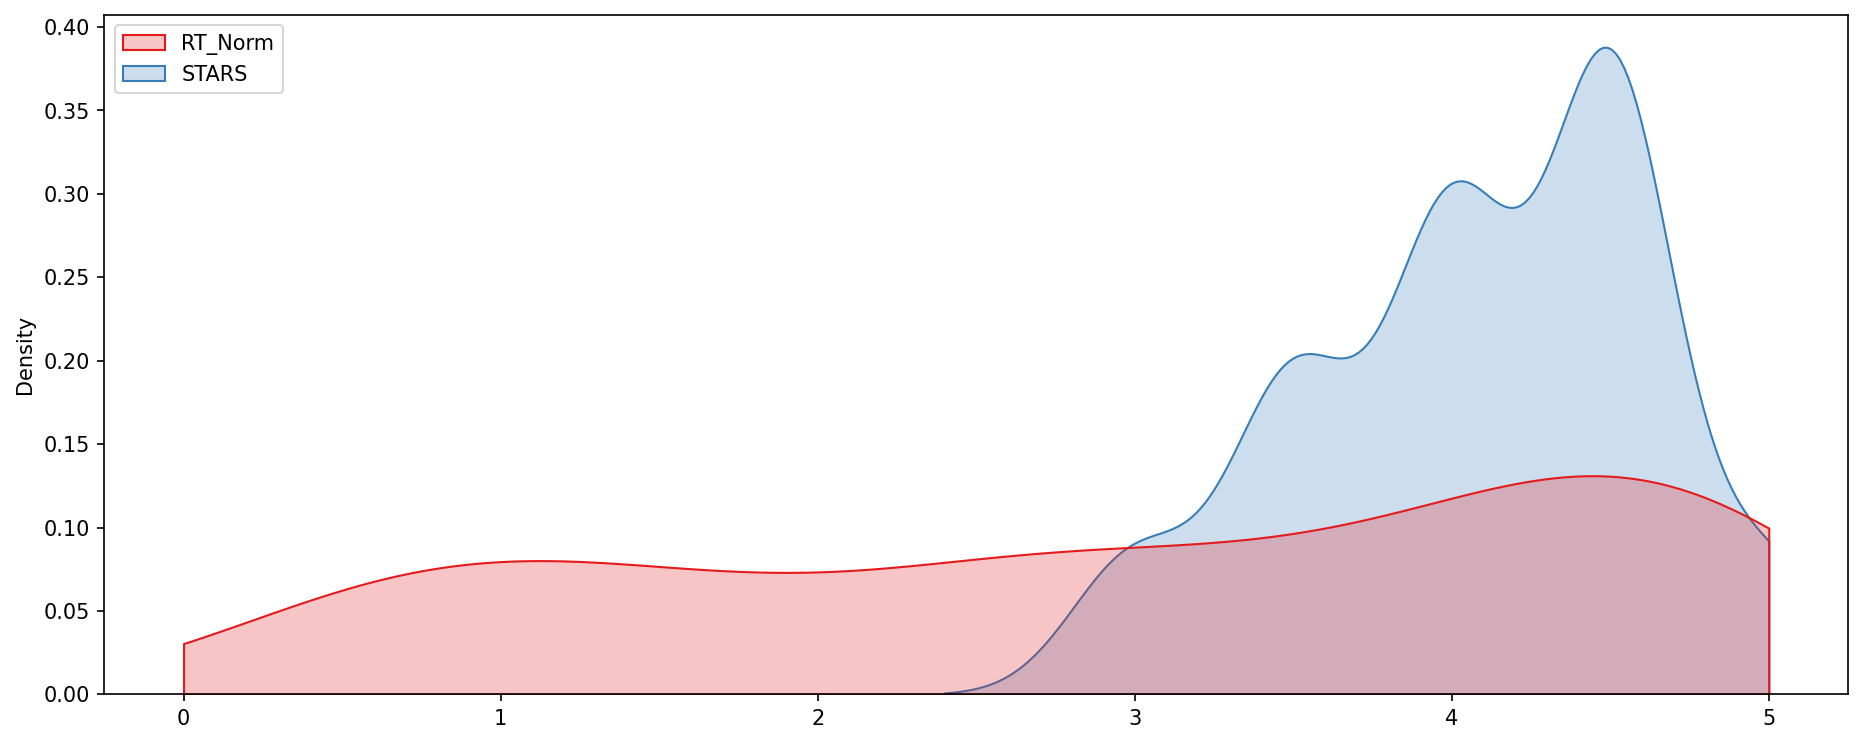

**Tâche facultative : Créez un histogramme comparant toutes les notes normalisées.**

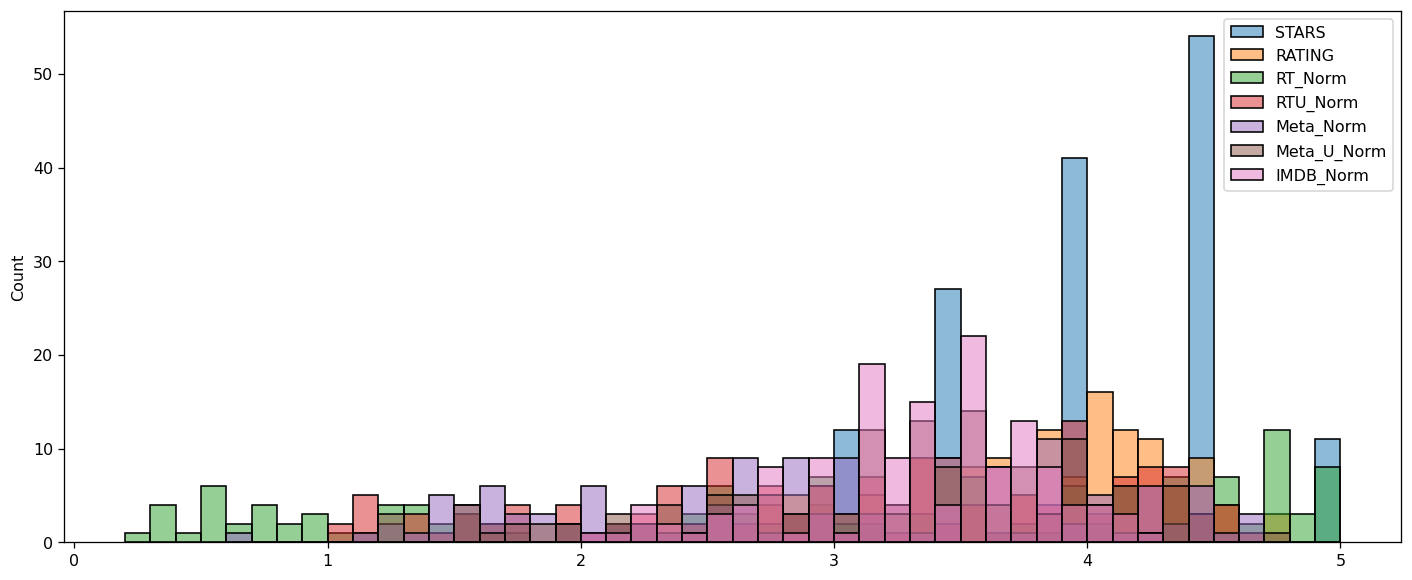

In [40]:
# code ici# TOMBO
plt.figure(figsize=(15, 6), dpi=115)
sns.histplot(data=norm_scores, x="STARS", binwidth=0.1, label='STARS', alpha=0.5)
sns.histplot(data=norm_scores, x="RATING", binwidth=0.1, label='RATING', alpha=0.5)
sns.histplot(data=norm_scores, x="RT_Norm", binwidth=0.1, label='RT_Norm', alpha=0.5)
sns.histplot(data=norm_scores, x="RTU_Norm", binwidth=0.1, label='RTU_Norm', alpha=0.5)
sns.histplot(data=norm_scores, x="Meta_Norm", binwidth=0.1, label='Meta_Norm', alpha=0.5)
sns.histplot(data=norm_scores, x="Meta_U_Norm", binwidth=0.1, label='Meta_U_Norm', alpha=0.5)
sns.histplot(data=norm_scores, x="IMDB_Norm", binwidth=0.1, label='IMDB_Norm', alpha=0.5)
plt.xlabel(None)
plt.legend(loc='upper right')
plt.show()

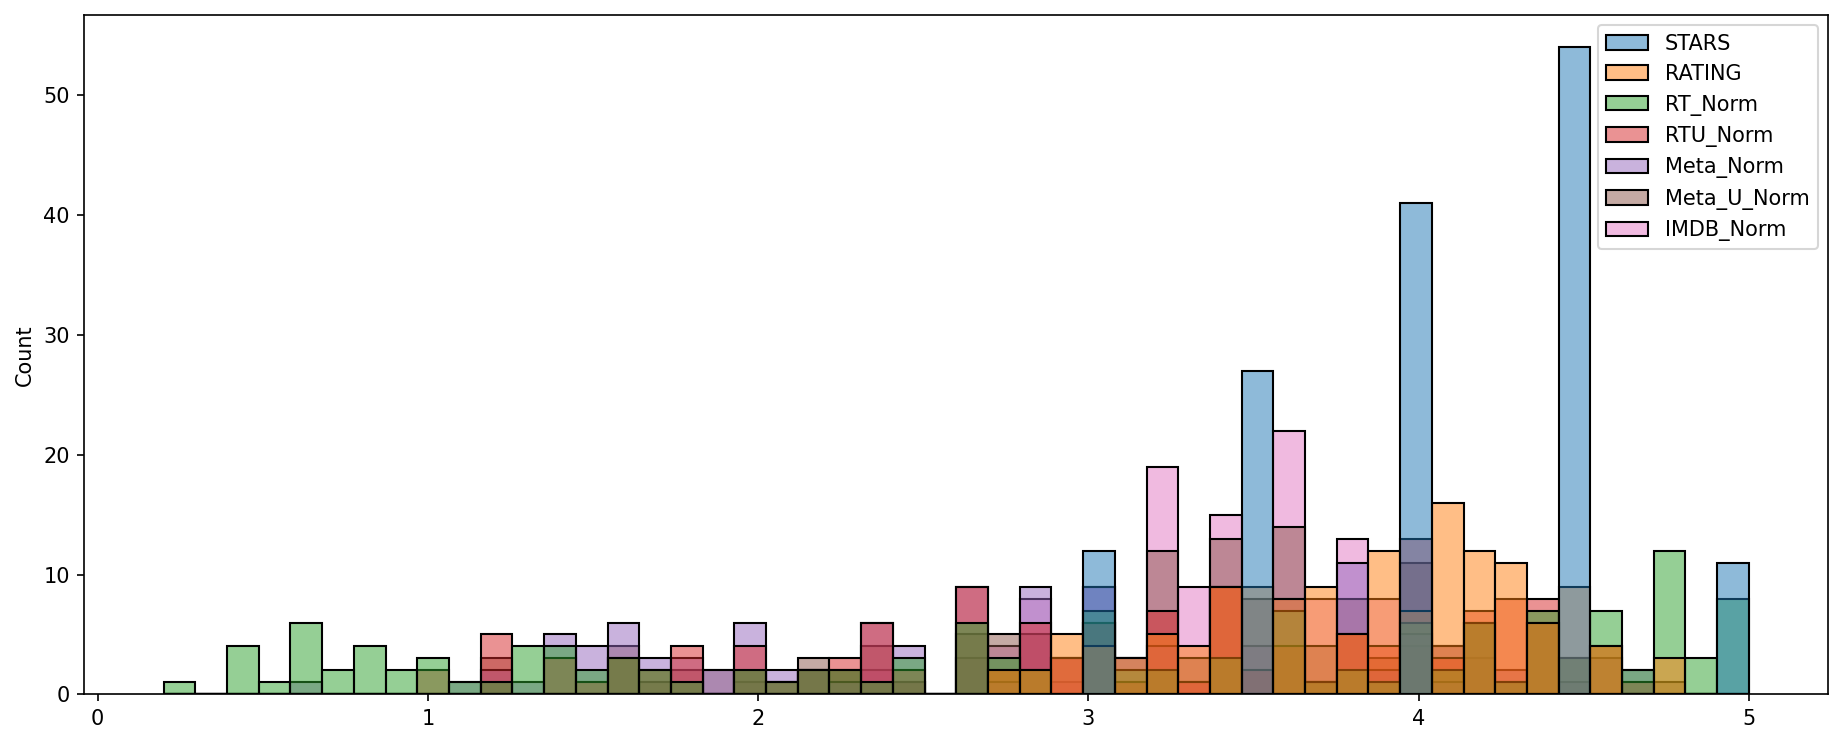

### Comment sont évalués les pires films sur toutes les plateformes ?

**Tâche : Créez une visualisation de clustermap de toutes les notes normalisées. Notez les différences de notation, les films les mieux notés doivent être regroupés par rapport aux films mal notés.**

**Remarque : Ce clustermap n'a pas besoin d'avoir les titres de FILM en tant qu'index, n'hésitez pas à le supprimer pour le clustermap.**

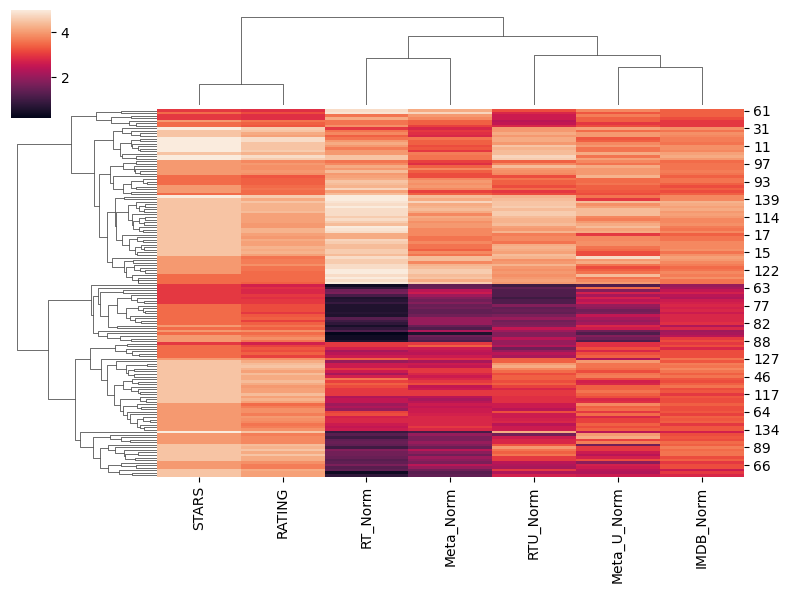

In [41]:
# code ici# TOMBO
sns.clustermap(data=norm_scores, figsize=(8,6))
plt.show()

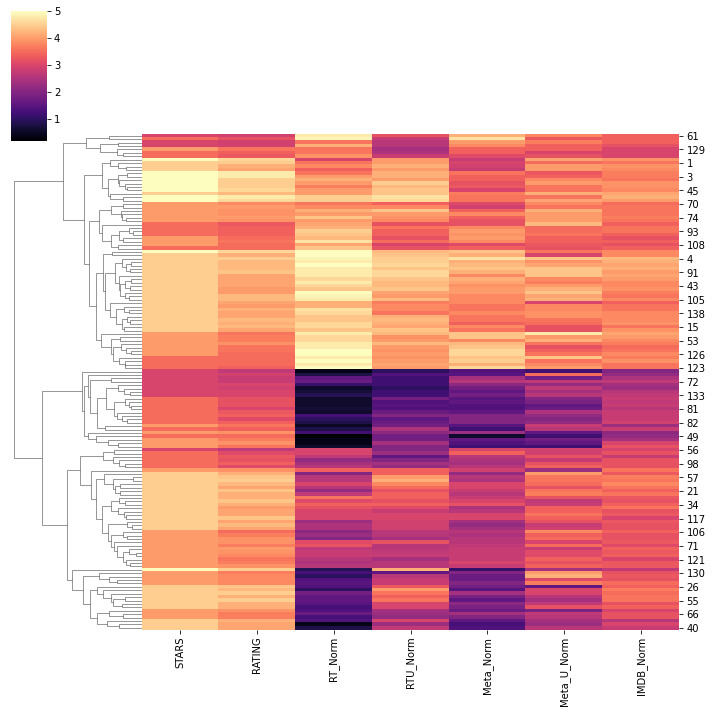

**Tâche : Il est clair que Fandango note les films de façon beaucoup plus généreuse que les autres plateformes, surtout si l'on considère qu'il affiche alors une version arrondie de sa note. Examinons le top 10 des pires films. Sur la base des évaluations des critiques de Rotten Tomatoes, quels sont les 10 films les moins bien notés ? Quels sont les scores normalisés sur toutes les plateformes pour ces films ? Vous devrez peut-être ajouter la colonne FILM à votre DataFrame de scores (notes) normalisés pour voir les résultats.**

In [42]:
# code ici# TOMBO
norm_scores2=fusion[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']].copy()
norm_scores2.sort_values('RT_Norm').head(10)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Tâche finale : Visualisez la distribution des notes sur toutes les plateformes pour les 10 films les plus mal notés par les critiques de RT.**

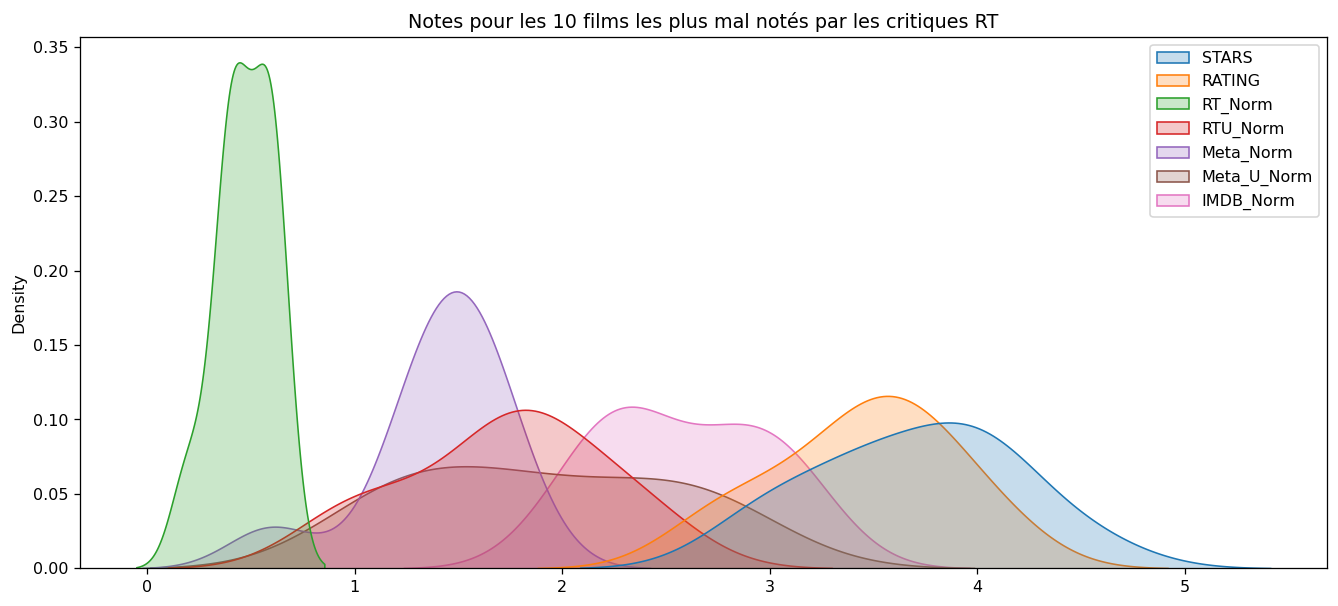

In [43]:
# code ici# TOMBO
plt.figure(figsize=(14,6), dpi=115)
norm_scores3 = norm_scores2.sort_values('RT_Norm')[:10]
sns.kdeplot(data=norm_scores3, fill=True)
plt.title('Notes pour les 10 films les plus mal notés par les critiques RT')
plt.show()

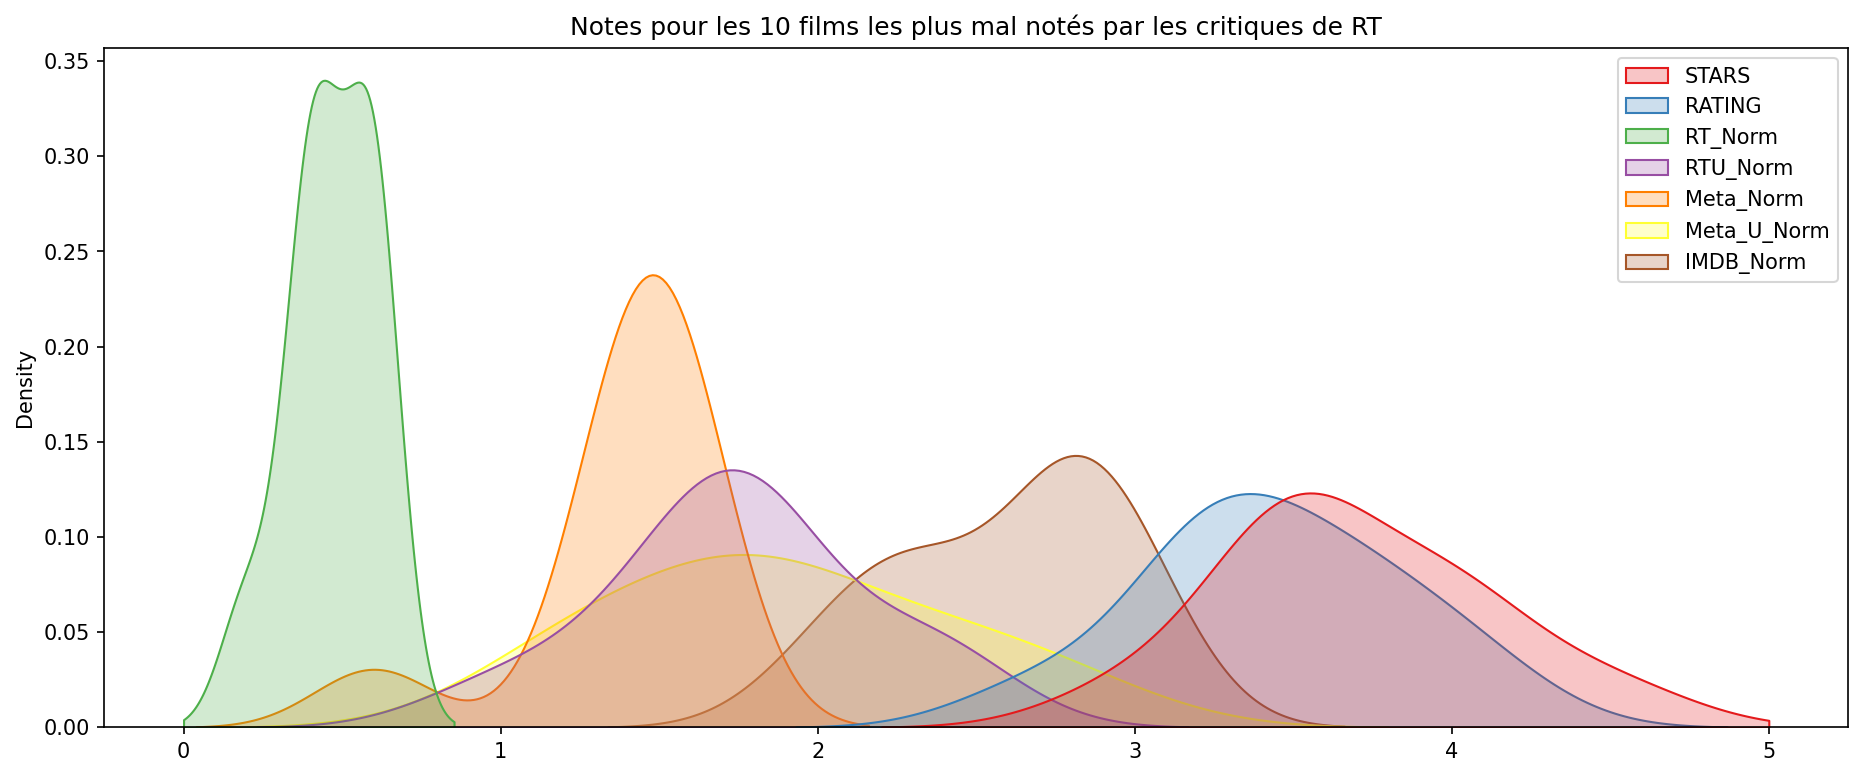

---
---
<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Réflexions finales : Wow ! Fandango affiche environ 3 à 4 étoiles pour des films clairement mauvais ! Remarquez le plus grand escroc : [Taken 3 !](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango affiche 4,5 étoiles sur son site pour un film avec une [note moyenne de 1,86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) sur les autres plateformes !**

In [61]:
# TOMBO
norm_scores3.loc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [ ]:
0.4+2.3+1.3+2.3+3

9.3

In [ ]:
9.3/5

1.86

**Bon courage !**